In [ ]:
!pip install yfinance

In [ ]:
!pip install cvxpy

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import cvxpy as cp

In [ ]:

url = 'https://en.wikipedia.org/wiki/S%26P_100'
tables = pd.read_html(url)
sp100_tickers = tables[2]['Symbol'].tolist()

In [ ]:
sp100_tickers.remove('BRK.B')

In [ ]:
tables[2]

In [ ]:
start_date = '2018-01-01'
end_date = '2023-12-31'

data = yf.download(sp100_tickers, start=start_date,
                   end=end_date)['Adj Close'].dropna(how='all', axis=1)

[*********************100%***********************]  100 of 100 completed


In [ ]:
data.head()

Ticker,AAPL,ABBV,ABT,ACN,ADBE,AIG,AMD,AMGN,AMT,AMZN,...,TXN,UNH,UNP,UPS,USB,V,VZ,WFC,WMT,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-02 00:00:00+00:00,40.568924,72.923508,52.293579,139.224014,177.699997,49.656757,10.98,144.391068,120.937508,59.450500,...,87.666260,200.148499,117.253464,98.553391,42.051941,109.311745,37.791500,50.242729,29.255867,61.637554
2018-01-03 00:00:00+00:00,40.561867,74.064674,52.409206,139.866592,181.039993,50.207577,11.55,147.115738,121.408836,60.209999,...,90.041245,202.248093,117.909790,100.736923,42.464447,110.399986,37.014923,50.629276,29.511057,62.848106
2018-01-04 00:00:00+00:00,40.750271,73.642296,52.320267,141.522705,183.220001,50.407871,12.12,146.495697,119.635033,60.479500,...,89.924957,203.125885,117.270767,101.390343,42.791328,110.810448,37.134933,51.262558,29.537769,62.935101
2018-01-05 00:00:00+00:00,41.214230,74.924240,52.471481,142.690125,185.339996,50.616508,11.88,147.368607,120.406273,61.457001,...,90.614220,206.999313,118.764732,101.701157,43.055958,113.464264,37.050213,51.607975,29.712847,62.884350
2018-01-08 00:00:00+00:00,41.061146,73.723785,52.320267,143.830444,185.039993,50.282673,12.28,147.327835,121.691620,62.343498,...,91.046028,203.406448,120.414085,102.936363,43.118221,113.922470,36.986675,51.024036,30.152023,63.167072


In [ ]:
returns = data.pct_change().dropna().apply(lambda x: np.log(1 + x))

In [ ]:
returns = returns.fillna(returns.mean())

In [ ]:
returns

Ticker,AAPL,ABBV,ABT,ACN,ADBE,AIG,AMD,AMGN,AMT,AMZN,...,TXN,UNH,UNP,UPS,USB,V,VZ,WFC,WMT,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2019-03-21 00:00:00+00:00,0.036168,0.010021,0.001500,0.011778,0.016950,0.010881,0.081777,0.004021,0.016414,0.012161,...,0.023350,0.006050,0.009951,0.017270,-0.014196,0.013245,0.010693,-0.010772,0.004249,0.005763
2019-03-22 00:00:00+00:00,-0.020926,-0.018385,-0.026452,-0.017992,-0.017142,-0.018827,-0.056041,-0.027419,-0.005459,-0.030409,...,-0.022894,-0.019756,-0.012313,-0.022566,-0.028182,-0.017678,0.024906,-0.031581,-0.007905,-0.016146
2019-03-25 00:00:00+00:00,-0.012165,-0.003139,0.003329,-0.000969,0.009886,-0.003997,-0.015285,-0.000590,0.010480,0.005363,...,-0.023711,-0.000931,0.005464,-0.004201,-0.003735,-0.000261,0.005341,-0.004772,-0.001120,-0.006983
2019-03-26 00:00:00+00:00,-0.010385,0.015599,0.009795,0.011204,0.012579,0.014035,-0.010840,0.008963,-0.003276,0.005340,...,0.011326,-0.014156,0.001918,0.014027,0.008488,0.014725,0.009113,0.019158,0.001527,0.012929
2019-03-27 00:00:00+00:00,0.008954,-0.010831,-0.003424,-0.002819,-0.012312,0.002088,-0.031636,-0.010411,-0.004934,-0.010176,...,-0.022026,-0.006926,0.007389,0.005244,-0.007864,-0.006979,0.004115,-0.004909,-0.011354,-0.007688
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-22 00:00:00+00:00,-0.005563,0.015283,0.005057,0.016212,-0.002319,0.005393,-0.002218,0.017144,0.004238,-0.002734,...,0.008536,0.000827,0.006053,0.006912,0.004607,-0.004286,0.001602,-0.005475,0.011880,0.001768
2023-12-26 00:00:00+00:00,-0.002845,-0.002068,0.001833,-0.002882,-0.000819,0.002984,0.026926,-0.000915,0.004868,-0.000065,...,0.015160,-0.000538,0.006996,-0.001391,0.012788,0.002821,-0.000267,0.009310,-0.001533,0.002254
2023-12-27 00:00:00+00:00,0.000518,0.001680,0.005114,0.001103,-0.003651,0.000298,0.018378,0.009221,0.010110,-0.000456,...,0.002456,0.005293,0.002118,-0.007559,-0.002954,-0.000888,-0.004546,-0.006265,0.009355,-0.004710


In [ ]:
# Number of assets
n = len(returns.columns)

# Expected returns
mu = returns.mean().values

# Covariance matrix
Sigma = np.cov(returns, rowvar=False).astype(np.float64)

# Variable for the portfolio weights
w = cp.Variable(n)

In [ ]:
mu

array([ 1.20099095e-03,  7.28556662e-04,  3.31472692e-04,  6.78551611e-04,
        6.90669218e-04,  4.87647962e-04,  1.45076979e-03,  4.61201138e-04,
        1.95192618e-04,  4.36207510e-04,  1.24681907e-03,  4.92355562e-04,
       -2.84964729e-04,  2.31244275e-04,  1.21639757e-04,  5.75319697e-04,
        6.30685899e-04,  1.62239311e-04, -3.97922337e-05,  7.59312384e-04,
        5.80543306e-05,  2.62618438e-04,  1.78706630e-04,  4.52539542e-04,
        5.95372824e-04,  9.21989106e-04,  3.95192768e-04,  7.56817850e-05,
        3.96324710e-04,  3.23206533e-04,  8.22395053e-04,  5.97291814e-04,
       -1.51131126e-04,  2.89359172e-04,  2.30573884e-04,  3.95208352e-04,
        4.65279662e-04,  3.71630860e-04,  4.57073498e-04,  5.90912904e-04,
        3.47701538e-04,  2.40698420e-05,  6.92807815e-04,  6.83800009e-04,
        6.64913058e-04,  6.12528874e-04,  3.24879713e-04,  3.61838828e-04,
        5.13653737e-05,  7.67965389e-04,  2.16962146e-04,  5.23742008e-04,
        3.04315051e-04,  

In [ ]:

# Portfolio expected return
expected_return = mu @ w

# Portfolio variance
variance = cp.quad_form(w, Sigma)

# Target expected return
target_return = 0.05

In [ ]:

# Problem constraints
constraints = [
    cp.sum(w) == 1,  # Sum of weights equals 1
    expected_return >= target_return  # Target expected return constraint
]

# Problem objective
objective = cp.Minimize(variance)

# Solve the problem
problem = cp.Problem(objective, constraints)
problem.solve()

# Optimal portfolio weights
optimal_weights = w.value

NotImplementedError: Strict inequalities are not allowed.

In [ ]:
sum(optimal_weights)

1.0000002049433727

In [ ]:
pd.DataFrame(returns.columns, optimal_weights).to_csv('returns.csv')

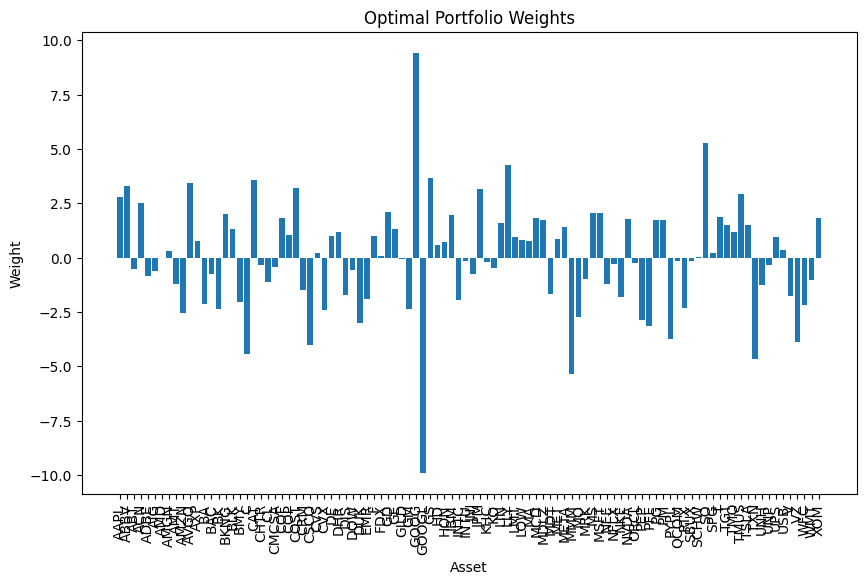

In [ ]:
import matplotlib.pyplot as plt

# Plot optimal portfolio weights
plt.figure(figsize=(10, 6))
plt.bar(returns.columns, optimal_weights)
plt.xlabel('Asset')
plt.ylabel('Weight')
plt.title('Optimal Portfolio Weights')
plt.xticks(rotation=90)

plt.show()